In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Display all rows and columns in the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [22]:
df = pd.read_csv(r"E:\data science\Projects\SENSOR-FAULT-DETECTION\artifacts\07_09_2024_11_47_27\training_data\training_file_data\final_file.csv")
df.head()
df_1 =df.copy()

In [23]:
df.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,Sensor-50,Sensor-51,Sensor-52,Sensor-53,Sensor-54,Sensor-55,Sensor-56,Sensor-57,Sensor-58,Sensor-59,Sensor-60,Sensor-61,Sensor-62,Sensor-63,Sensor-64,Sensor-65,Sensor-66,Sensor-67,Sensor-68,Sensor-69,Sensor-70,Sensor-71,Sensor-72,Sensor-73,Sensor-74,Sensor-75,Sensor-76,Sensor-77,Sensor-78,Sensor-79,Sensor-80,Sensor-81,Sensor-82,Sensor-83,Sensor-84,Sensor-85,Sensor-86,Sensor-87,Sensor-88,Sensor-89,Sensor-90,Sensor-91,Sensor-92,Sensor-93,Sensor-94,Sensor-95,Sensor-96,Sensor-97,Sensor-98,Sensor-99,Sensor-100,Sensor-101,Sensor-102,Sensor-103,Sensor-104,Sensor-105,Sensor-106,Sensor-107,Sensor-108,Sensor-109,Sensor-110,Sensor-111,Sensor-112,Sensor-113,Sensor-114,Sensor-115,Sensor-116,Sensor-117,Sensor-118,Sensor-119,Sensor-120,Sensor-121,Sensor-122,Sensor-123,Sensor-124,Sensor-125,Sensor-126,Sensor-127,Sensor-128,Sensor-129,Sensor-130,Sensor-131,Sensor-132,Sensor-133,Sensor-134,Sensor-135,Sensor-136,Sensor-137,Sensor-138,Sensor-139,Sensor-140,Sensor-141,Sensor-142,Sensor-143,Sensor-144,Sensor-145,Sensor-146,Sensor-147,Sensor-148,Sensor-149,Sensor-150,Sensor-151,Sensor-152,Sensor-153,Sensor-154,Sensor-155,Sensor-156,Sensor-157,Sensor-158,Sensor-159,Sensor-160,Sensor-161,Sensor-162,Sensor-163,Sensor-164,Sensor-165,Sensor-166,Sensor-167,Sensor-168,Sensor-169,Sensor-170,Sensor-171,Sensor-172,Sensor-173,Sensor-174,Sensor-175,Sensor-176,Sensor-177,Sensor-178,Sensor-179,Sensor-180,Sensor-181,Sensor-182,Sensor-183,Sensor-184,Sensor-185,Sensor-186,Sensor-187,Sensor-188,Sensor-189,Sensor-190,Sensor-191,Sensor-192,Sensor-193,Sensor-194,Sensor-195,Sensor-196,Sensor-197,Sensor-198,Sensor-199,Sensor-200,Sensor-201,Sensor-202,Sensor-203,Sensor-204,Sensor-205,Sensor-206,Sensor-207,Sensor-208,Sensor-209,Sensor-210,Sensor-211,Sensor-212,Sensor-213,Sensor-214,Sensor-215,Sensor-216,Sensor-217,Sensor-218,Sensor-219,Sensor-220,Sensor-221,Sensor-222,Sensor-223,Sensor-224,Sensor-225,Sensor-226,Sensor-227,Sensor-228,Sensor-229,Sensor-230,Sensor-231,Sensor-232,Sensor-233,Sensor-234,Sensor-235,Sensor-236,Sensor-237,Sensor-238,Sensor-239,Sensor-240,Sensor-241,Sensor-242,Sensor-243,Sensor-244,Sensor-245,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254,Sensor-255,Sensor-256,Sensor-257,Sensor-258,Sensor-259,Sensor-260,Sensor-261,Sensor-262,Sensor-263,Sensor-264,Sensor-265,Sensor-266,Sensor-267,Sensor-268,Sensor-269,Sensor-270,Sensor-271,Sensor-272,Sensor-273,Sensor-274,Sensor-275,Sensor-276,Sensor-277,Sensor-278,Sensor-279,Sensor-280,Sensor-281,Sensor-282,Sensor-283,Sensor-284,Sensor-285,Sensor-286,Sensor-287,Sensor-288,Sensor-289,Sensor-290,Sensor-291,Sensor-292,Sensor-293,Sensor-294,Sensor-295,Sensor-296,Sensor-297,Sensor-298,Sensor-299,Sensor-300,Sensor-301,Sensor-302,Sensor-303,Sensor-304,Sensor-305,Sensor-306,Sensor-307,Sensor-308,Sensor-309,Sensor-310,Sensor-311,Sensor-312,Sensor-313,Sensor-314,Sensor-315,Sensor-316,Sensor-317,Sensor-318,Sensor-319,Sensor-320,Sensor-321,Sensor-322,Sensor-323,Sensor-324,Sensor-325,Sensor-326,Sensor-327,Sensor-328,Sensor-329,Sensor-330,Sensor-331,Sensor-332,Sensor-333,Sensor-334,Sensor-335,Sensor-336,Sensor-337,Sensor-338,Sensor-339,Sensor-340,Sensor-341,Sensor-342,Sensor-343,Sensor-344,Sensor-345,Sensor-346,Sensor-347,Sensor-348,Sensor-349,Sensor-350,Sensor-351,Sensor-352,Sensor-353,Sensor-354,Sensor-355,Sensor-356,Sensor-357,Sensor-358,Sensor-359,Sensor-360,Sensor-361,Sensor-362,Sensor-363,Sensor-364,Sensor-365,Sensor-366,Sensor-367,Sensor-368,Sensor-369,Sensor-370,Sensor-371,Sensor-372,Sensor-37

In [24]:
df['Output'].value_counts()

Output
1    4562
0    3808
Name: count, dtype: int64

In [17]:

good_raw_path = "../artifacts/07_09_2024_10_49_40/training_data/good_raw_data"

import os

for file in os.listdir(good_raw_path):
    file_path = os.path.join(good_raw_path,file)
    data = pd.read_csv(file_path)
    print(file)
    print(data['Good/Bad'].value_counts())
    print("-"*30)

wafer_12092023_041238.csv
Good/Bad
0    419
1    418
Name: count, dtype: int64
------------------------------
wafer_13012024_090817.csv
Good/Bad
-1    89
 1    11
Name: count, dtype: int64
------------------------------
wafer_16012024_051629.csv
Good/Bad
-1    99
 1     1
Name: count, dtype: int64
------------------------------
wafer_20022020_090716.csv
Good/Bad
-1    37
Name: count, dtype: int64
------------------------------
wafer_21012024_080913.csv
Good/Bad
-1    99
 1     1
Name: count, dtype: int64
------------------------------
wafer_23012024_041211.csv
Good/Bad
0    419
1    418
Name: count, dtype: int64
------------------------------
wafer_23012024_041248.csv
Good/Bad
0    419
1    418
Name: count, dtype: int64
------------------------------
wafer_23052024_041211.csv
Good/Bad
0    419
1    418
Name: count, dtype: int64
------------------------------
wafer_23092023_041358.csv
Good/Bad
0    419
1    418
Name: count, dtype: int64
------------------------------
wafer_24042024_0412

In [10]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
import pandas as pd


# Define your transformation functions
def drop_unwanted_columns(df: pd.DataFrame):
    try:
        dropped_columns = ['Wafer']
        df.drop(columns=dropped_columns, inplace=True)
        print(f'Dropped columns :: Status: Success :: droped_columns:{dropped_columns}')
        return df
    except Exception as e:
        raise e

def drop_dublicate_rows(df: pd.DataFrame):
    try:
        before_shape = df.shape
        df.drop_duplicates(inplace=True)
        after_shape = df.shape
        no_of_dropped_rows = before_shape[0]-after_shape[0]
        print(f'Dropped Dublicate rows :: Status: Sucess :: no_of_rows_dropped:{no_of_dropped_rows}')
        return df
        
    except Exception as e:
        raise e

def drop_zero_std_columns(df: pd.DataFrame):
    try:
        before_shape = df.shape
        zero_std_columns = [column for column in df.columns if df[column].std() == 0]
        if "Output" in zero_std_columns:
            zero_std_columns.remove("Output")
        df.drop(columns=zero_std_columns, inplace=True)
        after_shape = df.shape
        print(f'Dropped Zero std Column :: Status: Sucess :: no_of_columns_dropped:{len(zero_std_columns)} :: dropped_columns:{zero_std_columns}')
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        return df
    except Exception as e:
        raise e

def handle_nan_values(df: pd.DataFrame):
    try:
        before_shape = df.shape
        # Drop columns with more than 50% NaN values
        higher_nan_column = df.columns[df.isnull().mean() * 100 > 50]
        df.drop(columns=higher_nan_column, inplace=True)
        print(f'Dropped NAN columns above 50% :: Status: Sucess :: no_of_columns_dropped:{len(higher_nan_column)} :: dropped_columns:{higher_nan_column}')
        after_shape = df.shape
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        # Define KNN imputer
        knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')  # Adjust the number of neighbors if needed
        
        # Apply KNN imputation
        knn_imputed_data = knn_imputer.fit_transform(df)
        
        # Convert back to DataFrame
        knn_imputed_df = pd.DataFrame(knn_imputed_data, columns=df.columns)
    
        return knn_imputed_df

    except Exception as e:
        raise e

def handle_high_skew_columns(df: pd.DataFrame):
    try:
        before_shape = df.shape
        high_skew_columns = df.columns[(df.skew() < -1) | (df.skew() > 1)]
        high_skew_columns = high_skew_columns.to_list()
        if "Output" in high_skew_columns:
            high_skew_columns.remove("Output")
        pw_transformation = PowerTransformer()
        data = pw_transformation.fit_transform(df[high_skew_columns])
        df[high_skew_columns] = data
        after_shape = df.shape
        print(f'handle high columns :: Status: Sucess :: no_of_columns_handled:{len(high_skew_columns)} :: handled_columns:{high_skew_columns}')
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        return df
        
    except Exception as e:
        raise e

def handle_outlier(df: pd.DataFrame):
    try:
        before_shape = df.shape
        for column in df.columns:
            if column !="Output":
                lower_bound = df[column].quantile(0.05)
                upper_bound = df[column].quantile(0.95)
                IQR = upper_bound-lower_bound
                lower_limit = lower_bound - (IQR*1.5)
                upper_limit = upper_bound + (IQR*1.5)
                # Remove outliers
                df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
                after_shape_ = df.shape
                print(f'handle outliers : handled_column:{column} : no_of_records_removed:{before_shape[0]-after_shape_[0]}')
        
        after_shape = df.shape
        print(f'handle outliers :: Status: Sucess')
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        print(f'No of records removed: {before_shape[0]-after_shape[0]}')
        print(f'No of records removed in percentage: {(before_shape[0]-after_shape[0])/before_shape[0]*100}')
        return df
        
    except Exception as e:
        raise e

# Define the FunctionTransformer for each function
drop_unwanted_columns_ = FunctionTransformer(func=drop_unwanted_columns)
drop_dublicate_rows_ = FunctionTransformer(func=drop_dublicate_rows)
drop_zero_std_columns_ = FunctionTransformer(func=drop_zero_std_columns)
handle_nan_values_ = FunctionTransformer(func=handle_nan_values)
handle_high_skew_columns_ = FunctionTransformer(func=handle_high_skew_columns)
handle_outlier_ = FunctionTransformer(func=handle_outlier)
df_1 = df.copy()
need_scale_columns = list(df.select_dtypes(exclude=["O","int64"]).columns)

# Pipeline with the transformations
custom_pipeline = Pipeline(
    [
        ("drop_unwanted_columns", drop_unwanted_columns_),
        ("drop_dublicate_rows", drop_dublicate_rows_),
        ("drop_zero_std_columns", drop_zero_std_columns_),
        ("handle_nan_values", handle_nan_values_),
        ("handle_high_skew_columns",handle_high_skew_columns_),
        ("handle_outlier", handle_outlier_)
    ]
)

# # Define the standard scaler
# standard_scalar = StandardScaler()

# Full preprocessing pipeline
# preprocessing_pipeline1 = Pipeline(
#     [
#         ('custom_preprocessing', custom_pipeline),
#         ('column_trans', ColumnTransformer(
#                                         transformers=[
#                                             ('scaling', standard_scalar, need_scale_columns)
#                                         ],
#                                         remainder='passthrough'))
#     ]
# )

# Transformed_df = custom_pipeline.fit_transform(df_1)
# X = Transformed_df.drop(columns=['Output'])
# y = Transformed_df['Output']

# # # Apply the preprocessing pipeline
# preproced_x = preprocessing_pipeline.fit_transform(X)
# X
# # # Apply the preprocessing pipeline
# preproced_df = preprocessing_pipeline.fit_transform(df_1)
# print(preproced_df.shape)


##### testing above methods

In [11]:

d1 = drop_unwanted_columns(df_1)
d1.shape

KeyError: "['Unnamed: 0'] not found in axis"

In [86]:
d2 = drop_dublicate_rows(d1)
d2.shape

(837, 591)

In [87]:
d3 = drop_zero_std_columns(d2)
d3.shape

(837, 475)

In [88]:
d4 = handle_nan_values(d3)
d4.shape

(837, 455)

In [89]:
d5 = handle_high_skew_columns(d4)
d5.shape

(837, 455)

In [93]:
def remove_outliers(df):
    for column in df.columns:
        if column !="Output":
            lower_bound = df[column].quantile(0.25)
            upper_bound = df[column].quantile(0.75)
            IQR = upper_bound-lower_bound
            lower_limit = lower_bound - (IQR*1.5)
            upper_limit = upper_bound + (IQR*1.5)
            # Remove outliers
            df_cleaned = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
        
    print(f'original_df :{df.shape}')
    print(f'remove_outliers_df: {df_cleaned.shape}')
    print(f'No of records removed: {df.shape[0]-df_cleaned.shape[0]}')
    print(f'No of records removed in percentage: {(df.shape[0]-df_cleaned.shape[0]/df.shape[0])/100}')
    return df_cleaned

In [94]:
d6 = remove_outliers(d5)
d6.shape

original_df :(837, 455)
remove_outliers_df: (813, 455)
No of records removed: 24
No of records removed in percentage: 8.360286738351254


(813, 455)

In [90]:
d6 = handle_outlier(d5)
d6.shape

(8, 455)

In [53]:
drop_unwanted_columns_ = FunctionTransformer(func=drop_unwanted_columns)
drop_dublicate_rows_ = FunctionTransformer(func=drop_dublicate_rows)
drop_zero_std_columns_ = FunctionTransformer(func=drop_zero_std_columns)
handle_nan_values_ = FunctionTransformer(func=handle_nan_values)
handle_high_skew_columns_ = FunctionTransformer(func=handle_high_skew_columns)
handle_outlier_ = FunctionTransformer(func=handle_outlier)



In [55]:
standard_scalar = StandardScaler()
custom_pipeline = Pipeline(
    [
        ("drop_unwanted_columns" ,drop_unwanted_columns_),
        ("drop_dublicate_rows",drop_dublicate_rows_),
        ("drop_zero_std_columns",drop_zero_std_columns_),
        ("handle_nan_values",handle_nan_values_),
        ("handle_high_skew_columns",handle_high_skew_columns_),
        ("handle_outlier",handle_outlier_)

    ]
)


preprocessing_pipeline = Pipeline(
    [
        ('custom_preprocessing', custom_pipeline),
        ('standard_scaling',stan)
    ]
)

In [56]:
df_1 = df.cop()

In [59]:
X= df.drop(columns=['Output'])
y = df['Output']

In [60]:
preproced_x = preprocessing_pipeline.fit_transform(X=X)
preproced_x

InvalidParameterError: The 'func' parameter of FunctionTransformer must be a callable or None. Got FunctionTransformer(func=FunctionTransformer(func=FunctionTransformer(func=FunctionTransformer(func=FunctionTransformer(func=FunctionTransformer(func=FunctionTransformer(func=<function drop_unwanted_columns at 0x000001B421100720>))))))) instead.

#### Main code below 

In [4]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
import pandas as pd

# Define your transformation functions
def drop_unwanted_columns(df: pd.DataFrame):
    try:
        dropped_columns = ['Unnamed: 0']
        df.drop(columns=dropped_columns, inplace=True)
        print(f'Dropped columns :: Status: Success :: droped_columns:{dropped_columns}')
        return df
    except Exception as e:
        raise e

def drop_dublicate_rows(df: pd.DataFrame):
    try:
        before_shape = df.shape
        df.drop_duplicates(inplace=True)
        after_shape = df.shape
        no_of_dropped_rows = before_shape[0]-after_shape[0]
        print(f'Dropped Dublicate rows :: Status: Sucess :: no_of_rows_dropped:{no_of_dropped_rows}')
        return df
        
    except Exception as e:
        raise e

def drop_zero_std_columns(df: pd.DataFrame):
    try:
        before_shape = df.shape
        zero_std_columns = [column for column in df.columns if df[column].std() == 0]
        if "Output" in zero_std_columns:
            zero_std_columns.remove("Output")
        df.drop(columns=zero_std_columns, inplace=True)
        after_shape = df.shape
        print(f'Dropped Zero std Column :: Status: Sucess :: no_of_columns_dropped:{len(zero_std_columns)} :: dropped_columns:{zero_std_columns}')
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        return df
    except Exception as e:
        raise e

def handle_nan_values(df: pd.DataFrame):
    try:
        before_shape = df.shape
        # Drop columns with more than 50% NaN values
        higher_nan_column = df.columns[df.isnull().mean() * 100 > 50]
        df.drop(columns=higher_nan_column, inplace=True)
        print(f'Dropped NAN columns above 50% :: Status: Sucess :: no_of_columns_dropped:{len(higher_nan_column)} :: dropped_columns:{higher_nan_column}')
        after_shape = df.shape
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        # Define KNN imputer
        knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')  # Adjust the number of neighbors if needed
        
        # Apply KNN imputation
        knn_imputed_data = knn_imputer.fit_transform(df)
        
        # Convert back to DataFrame
        knn_imputed_df = pd.DataFrame(knn_imputed_data, columns=df.columns)
    
        return knn_imputed_df

    except Exception as e:
        raise e

def handle_high_skew_columns(df: pd.DataFrame):
    try:
        before_shape = df.shape
        high_skew_columns = df.columns[(df.skew() < -1) | (df.skew() > 1)]
        high_skew_columns = high_skew_columns.to_list()
        if "Output" in high_skew_columns:
            high_skew_columns.remove("Output")
        pw_transformation = PowerTransformer()
        data = pw_transformation.fit_transform(df[high_skew_columns])
        df[high_skew_columns] = data
        after_shape = df.shape
        print(f'handle high columns :: Status: Sucess :: no_of_columns_handled:{len(high_skew_columns)} :: handled_columns:{high_skew_columns}')
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        return df
        
    except Exception as e:
        raise e

def handle_outlier(df: pd.DataFrame):
    try:
        before_shape = df.shape
        for column in df.columns:
            if column !="Output":
                lower_bound = df[column].quantile(0.05)
                upper_bound = df[column].quantile(0.95)
                IQR = upper_bound-lower_bound
                lower_limit = lower_bound - (IQR*1.5)
                upper_limit = upper_bound + (IQR*1.5)
                # Remove outliers
                df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
                after_shape_ = df.shape
                print(f'handle outliers : handled_column:{column} : no_of_records_removed:{before_shape[0]-after_shape_[0]}')
        
        after_shape = df.shape
        print(f'handle outliers :: Status: Sucess')
        print(f'Before dataframe shape:{before_shape} :: After dataframe shape:{after_shape}')
        print(f'No of records removed: {before_shape[0]-after_shape[0]}')
        print(f'No of records removed in percentage: {(before_shape[0]-after_shape[0])/before_shape[0]*100}')
        return df
        
    except Exception as e:
        raise e

# Define the FunctionTransformer for each function
drop_unwanted_columns_ = FunctionTransformer(func=drop_unwanted_columns)
drop_dublicate_rows_ = FunctionTransformer(func=drop_dublicate_rows)
drop_zero_std_columns_ = FunctionTransformer(func=drop_zero_std_columns)
handle_nan_values_ = FunctionTransformer(func=handle_nan_values)
handle_high_skew_columns_ = FunctionTransformer(func=handle_high_skew_columns)
handle_outlier_ = FunctionTransformer(func=handle_outlier)
df_1 = df.copy()
need_scale_columns = list(df.select_dtypes(exclude=["O","int64"]).columns)

# Pipeline with the transformations
custom_pipeline = Pipeline(
    [
        ("drop_unwanted_columns", drop_unwanted_columns_),
        ("drop_dublicate_rows", drop_dublicate_rows_),
        ("drop_zero_std_columns", drop_zero_std_columns_),
        ("handle_nan_values", handle_nan_values_),
        ("handle_high_skew_columns",handle_high_skew_columns_),
        ("handle_outlier", handle_outlier_)
    ]
)

# # Define the standard scaler
# standard_scalar = StandardScaler()

# Full preprocessing pipeline
# preprocessing_pipeline1 = Pipeline(
#     [
#         ('custom_preprocessing', custom_pipeline),
#         ('column_trans', ColumnTransformer(
#                                         transformers=[
#                                             ('scaling', standard_scalar, need_scale_columns)
#                                         ],
#                                         remainder='passthrough'))
#     ]
# )

Transformed_df = custom_pipeline.fit_transform(df_1)
X = Transformed_df.drop(columns=['Output'])
y = Transformed_df['Output']

# # # Apply the preprocessing pipeline
# preproced_x = preprocessing_pipeline.fit_transform(X)
# X
# # # Apply the preprocessing pipeline
# preproced_df = preprocessing_pipeline.fit_transform(df_1)
# print(preproced_df.shape)


KeyError: "['Unnamed: 0'] not found in axis"

In [170]:
# Pipelinea with the transformations
custom_pipeline = Pipeline(
    [
        ("drop_unwanted_columns", drop_unwanted_columns_),
        ("drop_dublicate_rows", drop_dublicate_rows_),
        ("drop_zero_std_columns", drop_zero_std_columns_),
        ("handle_nan_values", handle_nan_values_),
        ("handle_high_skew_columns",handle_high_skew_columns_),
        # ("handle_outlier", handle_outlier_)
    ]
)


Transformed_df = custom_pipeline.fit_transform(df_1)
X = Transformed_df.drop(columns=['Output'])
y = Transformed_df['Output']



Dropped columns :: Status: Success :: droped_columns:['Unnamed: 0']
Dropped Dublicate rows :: Status: Sucess :: no_of_rows_dropped:0
Dropped Zero std Column :: Status: Sucess :: no_of_columns_dropped:116 :: dropped_columns:['Sensor-6', 'Sensor-14', 'Sensor-43', 'Sensor-50', 'Sensor-53', 'Sensor-70', 'Sensor-98', 'Sensor-142', 'Sensor-150', 'Sensor-179', 'Sensor-180', 'Sensor-187', 'Sensor-190', 'Sensor-191', 'Sensor-192', 'Sensor-193', 'Sensor-194', 'Sensor-195', 'Sensor-227', 'Sensor-230', 'Sensor-231', 'Sensor-232', 'Sensor-233', 'Sensor-234', 'Sensor-235', 'Sensor-236', 'Sensor-237', 'Sensor-238', 'Sensor-241', 'Sensor-242', 'Sensor-243', 'Sensor-244', 'Sensor-257', 'Sensor-258', 'Sensor-259', 'Sensor-260', 'Sensor-261', 'Sensor-262', 'Sensor-263', 'Sensor-264', 'Sensor-265', 'Sensor-266', 'Sensor-267', 'Sensor-277', 'Sensor-285', 'Sensor-314', 'Sensor-315', 'Sensor-316', 'Sensor-323', 'Sensor-326', 'Sensor-327', 'Sensor-328', 'Sensor-329', 'Sensor-330', 'Sensor-331', 'Sensor-365', 

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [128]:
def experiment(X,y):
    result_dict = {}
    # X = df.drop(columns=['Output'])
    # y = df['Output']
    y = np.where(y==-1,1,0)
    # scalar = StandardScaler()
    # x_scaled = scalar.fit_transform(X)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)
    
    print("Using logistcregression")
    lg = LogisticRegression()
    lg.fit(X_train,y_train)
    result_dict['LogisticRegression'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}
    
   
    
    print("Using DecisionTree")
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    result_dict['DecisionTree'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using Randomforest")
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    result_dict['Randomforest'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using svc")
    model = SVC()
    model.fit(X_train,y_train)
    result_dict['SVC'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using KNeighborsClassifier")
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    result_dict['KNN'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using GaussianNB")
    model = GaussianNB()
    model.fit(X_train,y_train)
    result_dict['GaussianNB'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}


    print("Using XGBClassifier")
    model = XGBClassifier()
    model.fit(X_train,y_train)
    result_dict['XGBClassifier'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}


    return pd.DataFrame(result_dict)
    

In [129]:
experiment(X,y)

Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.957522,1.000000,0.998230,0.953982,0.953982,0.922124,1.000000
test_score,0.947090,0.910053,0.962963,0.962963,0.962963,0.867725,0.962963


In [130]:
def experiment_with_standard_scalar(X,y):
    result_dict = {}
    # X = df.drop(columns=['Output'])
    # y = df['Output']
    y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)

    X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=100)
    
    print("Using logistcregression")
    lg = LogisticRegression()
    lg.fit(X_train,y_train)
    result_dict['LogisticRegression'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}
    
   
    
    print("Using DecisionTree")
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    result_dict['DecisionTree'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using Randomforest")
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    result_dict['Randomforest'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using svc")
    model = SVC()
    model.fit(X_train,y_train)
    result_dict['SVC'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using KNeighborsClassifier")
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    result_dict['KNN'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}

    print("Using GaussianNB")
    model = GaussianNB()
    model.fit(X_train,y_train)
    result_dict['GaussianNB'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}


    print("Using XGBClassifier")
    model = XGBClassifier()
    model.fit(X_train,y_train)
    result_dict['XGBClassifier'] = {'training_score':model.score(X_train,y_train),'test_score':model.score(X_test,y_test)}


    return pd.DataFrame(result_dict)
    

In [131]:
experiment(X,y)

Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.957522,1.000000,1.000000,0.953982,0.953982,0.922124,1.000000
test_score,0.947090,0.925926,0.962963,0.962963,0.962963,0.867725,0.962963


In [224]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)
pca_data = PCA(n_components=217)

pca_x = pca_data.fit_transform(x_scaled)


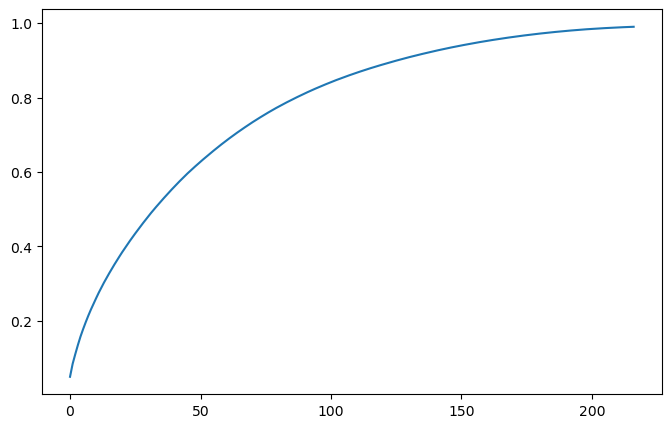

In [158]:
import matplotlib.pyplot as plt
EVR = pca_data.explained_variance_ratio_
plt.figure(figsize=(8, 5))
    # plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
    # plt.title('Scree Plot')
    # plt.xlabel('Principal Component')
    # plt.ylabel('Variance Explained')
    # plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.plot(np.cumsum(EVR))
plt.show()



In [143]:
next(i for i, evr in enumerate(np.cumsum(EVR)) if evr>=0.99)+1

216

In [156]:
experiment(pca_x,y)

Using logistcregression
Using DecisionTree
Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,1.000000,1.000000,1.000000,0.953982,0.955752,1.000000,1.000000
test_score,0.952381,0.878307,0.962963,0.962963,0.962963,0.962963,0.962963


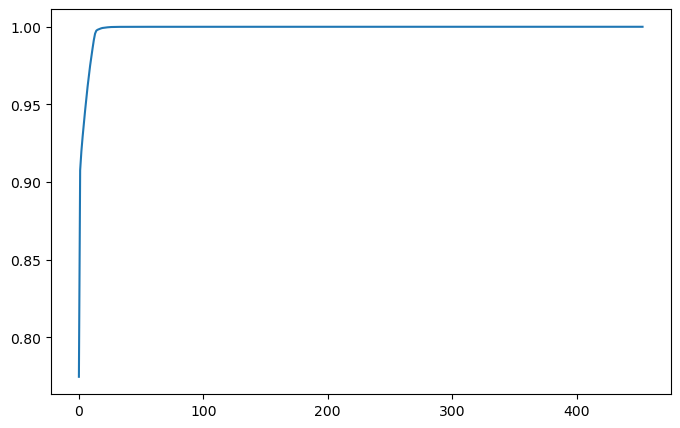

In [152]:
#without standard deviation
pca_data = PCA()

pca_x = pca_data.fit_transform(X)
import matplotlib.pyplot as plt
EVR = pca_data.explained_variance_ratio_
plt.figure(figsize=(8, 5))
    # plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
    # plt.title('Scree Plot')
    # plt.xlabel('Principal Component')
    # plt.ylabel('Variance Explained')
    # plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.plot(np.cumsum(EVR))
plt.show()


In [153]:
experiment(pca_x,y)

Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.612389,1.000000,1.000000,0.953982,0.953982,0.994690,1.000000
test_score,0.444444,0.920635,0.962963,0.962963,0.962963,0.962963,0.962963


#### Final conclusion go for standard scalar before PCA

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

# Define the models
models = {
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(eval_metric='mlogloss')  # eval_metric required for classification tasks in XGBoost
}

# Perform cross-validation
cv_results = {}
y = df_1['Output']
y = np.where(y==-1,1,0)
for model_name, model in models.items():
    scores = cross_val_score(model, pca_x, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"{model_name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")


SVC Cross-Validation Scores: [0.9602649  0.95364238 0.95364238 0.95364238 0.96      ]
SVC Mean Accuracy: 0.9562 ± 0.0032

KNN Cross-Validation Scores: [0.96688742 0.95364238 0.95364238 0.95364238 0.96      ]
KNN Mean Accuracy: 0.9576 ± 0.0053

RandomForest Cross-Validation Scores: [0.9602649  0.95364238 0.95364238 0.95364238 0.96      ]
RandomForest Mean Accuracy: 0.9562 ± 0.0032

XGBClassifier Cross-Validation Scores: [0.9602649  0.95364238 0.95364238 0.95364238 0.96      ]
XGBClassifier Mean Accuracy: 0.9562 ± 0.0032



In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

# Define the models
models = {
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(eval_metric='mlogloss')  # eval_metric required for classification tasks in XGBoost
}

# Perform cross-validation
cv_results = {}

y_ = np.where(y==-1,1,0)
for model_name, model in models.items():
    scores = cross_val_score(model, pca_x, y_, cv=15, scoring='accuracy')  # 5-fold cross-validation
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"{model_name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")


SVC Cross-Validation Scores: [0.96078431 0.94117647 0.94117647 0.94117647 0.96       0.96
 0.96       0.96       0.96       0.96       0.96       0.96
 0.96       0.96       0.96      ]
SVC Mean Accuracy: 0.9563 ± 0.0076

KNN Cross-Validation Scores: [0.96078431 0.96078431 0.94117647 0.94117647 0.96       0.96
 0.96       0.96       0.96       0.96       0.96       0.96
 0.96       0.96       0.96      ]
KNN Mean Accuracy: 0.9576 ± 0.0064

RandomForest Cross-Validation Scores: [0.96078431 0.94117647 0.94117647 0.94117647 0.96       0.96
 0.96       0.96       0.96       0.96       0.96       0.96
 0.96       0.96       0.96      ]
RandomForest Mean Accuracy: 0.9563 ± 0.0076

XGBClassifier Cross-Validation Scores: [0.96078431 0.94117647 0.94117647 0.94117647 0.96       0.96
 0.96       0.96       0.96       0.96       0.96       0.96
 0.96       0.96       0.96      ]
XGBClassifier Mean Accuracy: 0.9563 ± 0.0076



In [171]:
experiment(X,y)

Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.960128,1.000000,1.000000,0.960128,0.960128,0.545455,1.000000
test_score,0.938095,0.904762,0.942857,0.942857,0.942857,0.466667,0.942857


In [172]:
experiment_with_standard_scalar(X,y)

Using logistcregression
Using DecisionTree
Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,1.000000,1.000000,1.000000,0.960128,0.961722,0.079745,1.000000
test_score,0.919048,0.885714,0.942857,0.942857,0.942857,0.133333,0.942857


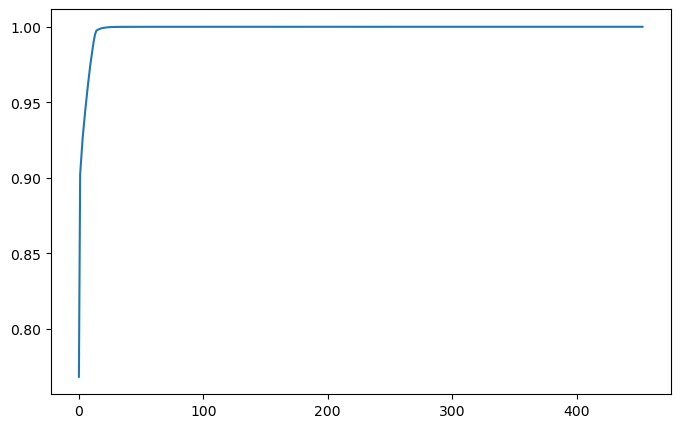

In [173]:
pca_data = PCA()

pca_x = pca_data.fit_transform(X)
import matplotlib.pyplot as plt
EVR = pca_data.explained_variance_ratio_
plt.figure(figsize=(8, 5))
    # plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
    # plt.title('Scree Plot')
    # plt.xlabel('Principal Component')
    # plt.ylabel('Variance Explained')
    # plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.plot(np.cumsum(EVR))
plt.show()

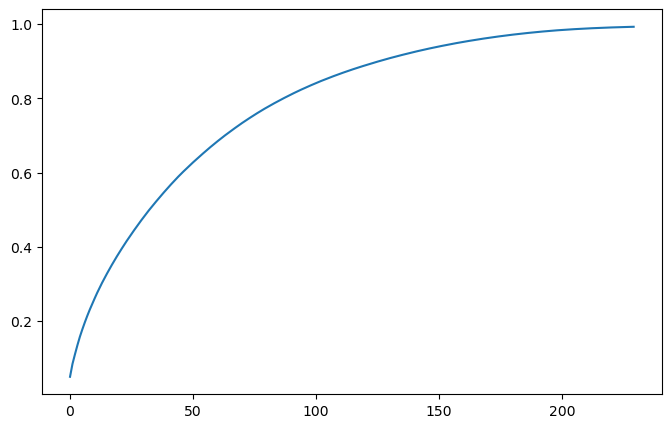

In [182]:
scaled_data = StandardScaler().fit_transform(X)
pca_data = PCA(230)

pca_x = pca_data.fit_transform(scaled_data)
import matplotlib.pyplot as plt
EVR = pca_data.explained_variance_ratio_
plt.figure(figsize=(8, 5))
    # plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
    # plt.title('Scree Plot')
    # plt.xlabel('Principal Component')
    # plt.ylabel('Variance Explained')
    # plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.plot(np.cumsum(EVR))
plt.show()

In [183]:
experiment(pca_x,y)

Using logistcregression
Using DecisionTree
Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,1.000000,1.000000,1.000000,0.953982,0.955752,1.000000,1.000000
test_score,0.952381,0.883598,0.962963,0.962963,0.962963,0.962963,0.962963


In [187]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

y_ = np.where(y==-1,1,0)
# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(eval_metric='mlogloss')
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Apply SMOTE in pipeline
cv_results = {}
for model_name, model in models.items():
    # Create a pipeline with SMOTE and the classifier
    pipeline = ImbPipeline([
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
        ('classifier', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, pca_x, y_, cv=skf, scoring='accuracy')
    cv_results[model_name] = scores
    
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"{model_name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")


LogisticRegression Cross-Validation Scores: [0.77631579 0.89473684 0.90789474 0.90789474 0.88       0.96
 0.90666667 0.85333333 0.82666667 0.90666667]
LogisticRegression Mean Accuracy: 0.8820 ± 0.0488

GaussianNB Cross-Validation Scores: [0.96052632 0.94736842 0.94736842 0.94736842 0.96       0.96
 0.96       0.96       0.93333333 0.96      ]
GaussianNB Mean Accuracy: 0.9536 ± 0.0088

SVC Cross-Validation Scores: [0.96052632 0.94736842 0.94736842 0.94736842 0.96       0.96
 0.96       0.96       0.96       0.96      ]
SVC Mean Accuracy: 0.9563 ± 0.0058

KNN Cross-Validation Scores: [0.07894737 0.10526316 0.27631579 0.09210526 0.05333333 0.46666667
 0.13333333 0.08       0.09333333 0.13333333]
KNN Mean Accuracy: 0.1513 ± 0.1203

RandomForest Cross-Validation Scores: [0.96052632 0.94736842 0.94736842 0.94736842 0.96       0.96
 0.96       0.96       0.96       0.96      ]
RandomForest Mean Accuracy: 0.9563 ± 0.0058

XGBClassifier Cross-Validation Scores: [0.96052632 0.93421053 0.94736842

In [203]:
import hdbscan
import pandas as pd

# Assuming 'pca_x' is your feature set after PCA
# Apply HDBSCAN clustering

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
clusters = clusterer.fit_predict(X_res)
smote_data_df = pd.DataFrame(X_res)

# Step 2: Create DataFrame for cluster labels
cluster_labels_df = pd.DataFrame({'Cluster': clusters})

# Step 3: Concatenate DataFrames
smote_data_with_clusters = pd.concat([smote_data_df, cluster_labels_df], axis=1)

# Display the result
smote_data_with_clusters['Cluster'].value_counts()


Cluster
-1     1006
 22      28
 15      28
 5       27
 9       23
 16      23
 13      23
 14      21
 0       20
 20      20
 8       19
 4       18
 19      18
 23      16
 6       16
 7       16
 12      15
 11      15
 21      15
 2       15
 3       14
 18      13
 1       12
 17      11
 10      10
Name: count, dtype: int64

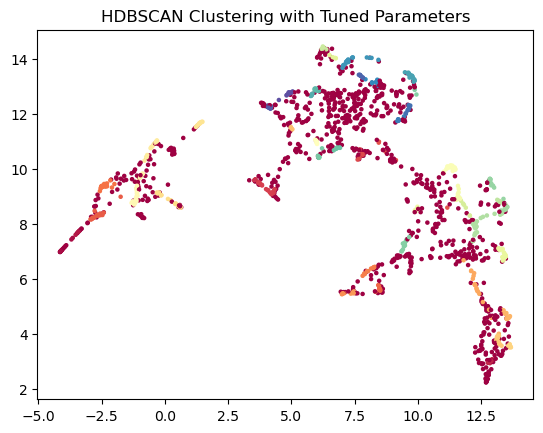

In [205]:
import hdbscan
import matplotlib.pyplot as plt
import umap

# Example: Adjusting parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3, metric='euclidean', cluster_selection_epsilon=0.1)
clusters = clusterer.fit_predict(X_res)

# Visualize results with UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_res)
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='Spectral', s=5)
plt.title('HDBSCAN Clustering with Tuned Parameters')
plt.show()


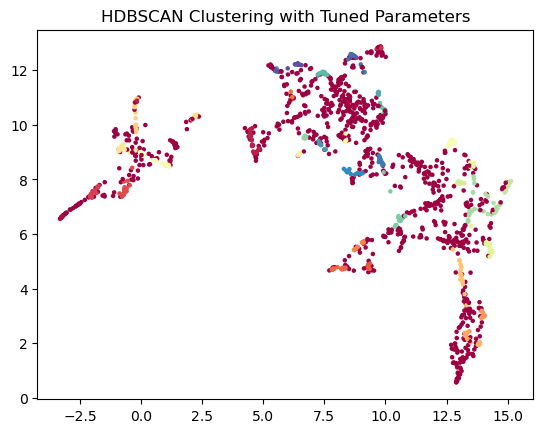

In [209]:
import hdbscan
import matplotlib.pyplot as plt
import umap

# Example: Adjusting parameters
clusterer = hdbscan.HDBSCAN()
clusters = clusterer.fit_predict(X_res)

# Visualize results with UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_res)
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='Spectral', s=5)
plt.title('HDBSCAN Clustering with Tuned Parameters')
plt.show()


In [210]:
pd.DataFrame(clusters).value_counts()

0  
-1     910
 1      25
 22     23
 26     23
 19     22
 13     22
 25     21
 4      20
 17     19
 34     17
 12     17
 35     17
 15     17
 33     17
 6      16
 3      16
 28     16
 30     15
 0      13
 23     13
 24     13
 9      13
 36     13
 14     12
 29     11
 37     11
 5      11
 21     10
 27     10
 10     10
 8      10
 20      9
 31      9
 32      8
 16      7
 11      7
 7       7
 2       6
 18      6
Name: count, dtype: int64

In [216]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Assuming X is your feature set and y are the labels



# Step 2: Find Optimal Number of Clusters using K-Means
# Elbow Method (Knee Locator)
# Calculate inertia for each number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_x)
    inertia.append(kmeans.inertia_)

kneedle = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow
print(f"Optimal number of clusters based on Elbow Method: {optimal_clusters}")

# # Get the optimal number of clusters
# optimal_clusters = kneedle.elbow
# print(f"Optimal number of clusters based on Elbow Method: {optimal_clusters}")

# Fit K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_x)

# Add cluster labels to the data
X_clusters = pd.DataFrame(pca_x)
X_clusters['Cluster'] = clusters
y_clusters = pd.Series(y, name='Target')

# Step 3: Evaluate Clusters using Silhouette Score
silhouette_avg = silhouette_score(pca_x, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# # Step 4: Custom Model Training for Each Cluster
# y_ = np.where(y == -1, 1, 0)  # Binary transformation for the target
# models = {
#     "LogisticRegression": LogisticRegression(),
#     "GaussianNB": GaussianNB(),
#     "SVC": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "RandomForest": RandomForestClassifier(),
#     "XGBClassifier": XGBClassifier(eval_metric='mlogloss')
# }

# skf = StratifiedKFold(n_splits=10)

# cv_results = {}
# for cluster in np.unique(clusters):
#     if cluster == -1:
#         continue  # Skip noise
    
#     print(f"Training model for Cluster {cluster}")
    
#     # Extract data for the cluster
#     cluster_data = X_clusters[X_clusters['Cluster'] == cluster]
#     cluster_target = y_clusters[X_clusters['Cluster'] == cluster]
    
#     # Handle class imbalance within the cluster
#     smote = SMOTE(random_state=42)
#     cluster_data_res, cluster_target_res = smote.fit_resample(cluster_data, cluster_target)
    
#     for model_name, model in models.items():
#         # Create a pipeline with SMOTE and the classifier
#         pipeline = ImbPipeline([
#             ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
#             ('classifier', model)
#         ])
        
#         # Perform cross-validation
#         scores = cross_val_score(pipeline, cluster_data_res, cluster_target_res, cv=skf, scoring='accuracy')
#         cv_results[f"Cluster {cluster} - {model_name}"] = scores
        
#         print(f"Cluster {cluster} - {model_name} Cross-Validation Scores: {scores}")
#         print(f"Cluster {cluster} - {model_name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

Optimal number of clusters based on Elbow Method: 3
Silhouette Score: 0.0370


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [220]:
y.shape

AttributeError: 'ellipsis' object has no attribute 'shape'

In [218]:
import warnings
warnings.filterwarnings('ignore')

In [225]:
y_main = y.copy()

In [227]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming X_pca is your PCA-transformed features and y is your target variable
X_pca = pca_x
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters based on previous steps
clusters = kmeans.fit_predict(X_pca)

# Convert target variable for binary classification
y_ = np.where(y == -1, 1, 0)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    # "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(eval_metric='mlogloss')
}

# Store results
cv_results = {}

# Apply SMOTE within each cluster and train models
for cluster_label in np.unique(clusters):
    # Filter data for the current cluster
    X_cluster = X_pca[clusters == cluster_label]
    y_cluster = y[clusters == cluster_label]
    y_cluster_ = np.where(y_cluster == -1, 1, 0)
    
    # Check if the cluster has data points
    if X_cluster.shape[0] == 0:
        print(f"Cluster {cluster_label} is empty. Skipping.")
        continue
    
    # Apply SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_cluster, y_cluster_)
    
    # Check if resampling resulted in data
    if X_resampled.shape[0] == 0:
        print(f"After SMOTE, Cluster {cluster_label} has no samples. Skipping.")
        continue
    
    # Train models
    for model_name, model in models.items():
        # Create a pipeline with SMOTE and the classifier
        pipeline = ImbPipeline([
            ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
            ('classifier', model)
        ])
        
        # Perform cross-validation
        scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=skf, scoring='accuracy')
        cv_results[(model_name, cluster_label)] = scores
        
        print(f"Cluster {cluster_label} - {model_name} Cross-Validation Scores: {scores}")
        print(f"Cluster {cluster_label} - {model_name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")


Cluster 0 - LogisticRegression Cross-Validation Scores: [0.91666667 0.91666667 0.95833333 0.97916667 1.         0.95744681
 1.         0.93617021 0.89361702 0.95744681]
Cluster 0 - LogisticRegression Mean Accuracy: 0.9516 ± 0.0341

Cluster 0 - GaussianNB Cross-Validation Scores: [0.83333333 0.97916667 0.95833333 0.95833333 1.         0.95744681
 0.95744681 0.95744681 0.95744681 1.        ]
Cluster 0 - GaussianNB Mean Accuracy: 0.9559 ± 0.0441

Cluster 0 - SVC Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cluster 0 - SVC Mean Accuracy: 1.0000 ± 0.0000

Cluster 0 - KNN Cross-Validation Scores: [0.54166667 0.52083333 0.5625     0.60416667 0.53191489 0.53191489
 0.68085106 0.57446809 0.5106383  0.57446809]
Cluster 0 - KNN Mean Accuracy: 0.5633 ± 0.0477

Cluster 0 - RandomForest Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cluster 0 - RandomForest Mean Accuracy: 1.0000 ± 0.0000

Cluster 0 - XGBClassifier Cross-Validation Scores: [0.95833333 0.97916667 1.         1.   

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5